# 7 VALIDACION DEL MODELO DATA EXTERNA

In [309]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score,plot_roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import seaborn as sb
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

## 7.1 Cargo la data de zonas protegidas

In [310]:
datos_protegido=gpd.read_file("C:/Users/crist/Downloads/Snaspe.zip")
datos_protegido["geometry"]=datos_protegido["geometry"].to_crs("EPSG:4326")
datos_protegido


,objectid,st_area_sh,st_length_,Nombre,Tipo_Snasp,Region,Cod_Region,geometry
0,10921,1.970656e+09,1.388746e+06,P.N.Cabo de Hornos,Parque,Región de Magallanes y Antártica Chilena,12,"MULTIPOLYGON (((-67.36955 -55.56702, -67.36898..."
1,10150,2.663508e+02,2.139039e+02,None,None,Región de Magallanes y Antártica Chilena,12,"POLYGON ((-69.33012 -54.62866, -69.32949 -54.6..."
2,10142,3.143100e+04,9.173960e+02,None,None,Región de Magallanes y Antártica Chilena,12,"POLYGON ((-71.40645 -53.96042, -71.40665 -53.9..."
3,10129,4.558119e+04,8.557300e+02,None,None,Región de Magallanes y Antártica Chilena,12,"POLYGON ((-71.44853 -53.99594, -71.44900 -53.9..."
4,10126,3.025963e+05,2.331806e+03,None,None,Región de Magallanes y Antártica Chilena,12,"POLYGON ((-71.40618 -53.95767, -71.40644 -53.9..."
...,...,...,...,...,...,...,...,...
132,12469,5.376587e+09,1.192382e+06,Parque Pumalín,Parque,Región de Los Lagos,10,"MULTIPOLYGON (((-72.24876 -42.49371, -72.24875..."
133,12471,7.210095e+07,1.238586e+05,Parque Nacional Rapa Nui,Parque,Región de Valparaíso,5,"POLYGON ((-109.38866 -27.05918, -109.38865 -27..."
134,12473,1.455558e+07,1.538017e+04,Parque Nacional Rapa Nui,Parque,Región de Valparaíso,5,"POLYGON ((-109.44119 -27.16336, -109.43909 -27..."
135,12472,1.234812e+06,4.720501e+03,Parque Nacional Rapa Nui,Parque,Región de Valparaíso,5,"POLYGON ((-109.39813 -27.14482, -109.39839 -27..."


## 7.2 Descargo nuevos proyectos para validar los modelos
Actualmente hay 28187 proyectos que han pasado por evaluación de impacto ambiental. Descargo los mas reciente para ver que el modelo no lo a visto 

In [311]:
df1=pd.read_excel("c:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Data_nueva/seia (1).xls", )
df1=df1.iloc[:-1,:]
df2=pd.read_excel("c:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Data_nueva/seia (2).xls", )
df2=df2.iloc[:-1,:]
df3=pd.read_excel("c:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Data_nueva/seia (3).xls", )
df3=df3.iloc[:-1,:]
df4=pd.read_excel("c:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Data_nueva/seia (4).xls", )
df4=df4.iloc[:-1,:]
df5=pd.read_excel("c:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Data_nueva/seia (5).xls", )
df5=df5.iloc[:-1,:]

validar=pd.concat([df1,df2,df3,df4,df5]).reset_index(drop=True)
print ("Largo de los 3 archivo", validar.shape[0])


Largo de los 3 archivo 5000


### 7.3 Obtengo el hipervinculo

In [312]:
import xlrd
reg_file="c:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Data_nueva/seia (1).xls"
reg_file1="c:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Data_nueva/seia (2).xls"
reg_file2="c:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Data_nueva/seia (3).xls"
reg_file3="c:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Data_nueva/seia (4).xls"
reg_file4="c:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/Data_nueva/seia (5).xls"

largolista=[reg_file,reg_file1,reg_file2,reg_file3,reg_file4]
lista=[]
for y in range(len(largolista)):
    book = xlrd.open_workbook(largolista[y], formatting_info=True)
    our_sheet = book.sheet_by_index(0)   
    for i in range(1,1001):
        link = our_sheet.hyperlink_map.get((i, 1))
        url = '(No URL)' if link is None else link.url_or_path
        lista.append(url)

In [313]:
validar=pd.concat([validar,pd.DataFrame(lista)],axis=1)

### 7.3.1 Anexo los hipervinculo a la data principal

In [314]:
validar=validar[validar["Fecha calificación"].isnull()==False]
print ("Largo sin proyecto clasificados", validar.shape[0])
validar=validar.drop_duplicates()
print ("Largo sin duplicados", validar.shape[0])
validar.reset_index(drop=True,inplace=True)
validar

Largo sin proyecto clasificados 4576
Largo sin duplicados 4542


,Nombre,WEB,Tipo,Región,Comunas,Provincias,Tipología,Titular,Inversión (MMU$),Fecha presentación,Estado,Fecha calificación,Sector productivo,Latitud punto representativo,Longitud punto representativo,0
0,MEJORAMIENTO Y ACTUALIZACIÓN INSTALACIONES AGR...,Ver,DIA,Séptima,Romeral,Curicó-Talca-Cauquenes-Linares,l3,AGRICOLA SOLER CORTINA S.A,2.350000,2022-09-16 14:59:59,Desistido,2022-08-24 15:59:59,Agropecuario,-35.066846,-71.203770,https://seia.sea.gob.cl/expediente/expediente....
1,La Lonja de Nogales,Ver,EIA,Quinta,Nogales,Petorca-San Felipe-Los Andes-Quillota-Valparaí...,g1,roberto gumecindo revuelta bravo,8.500000,2022-09-02 15:59:59,No Admitido a Tramitación,2022-09-02 15:59:59,Inmobiliarios,-32.741443,-71.203133,https://seia.sea.gob.cl/expediente/expediente....
2,Regularización de Actividades Banco Arenero Pr...,Ver,DIA,RM,San José de Maipo,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,i5,Sociedad Catalán Herrera Hermanos y Compañía L...,0.030000,2022-09-01 15:59:59,No Admitido a Tramitación,2022-09-01 15:59:59,Minería,-33.591710,-70.478889,https://seia.sea.gob.cl/expediente/expediente....
3,EXTRACCION DE ARIDOS DESDE POZO LASTRERO SANTA...,Ver,DIA,Novena,Angol,Malleco-Cautín,i5,agricola y forestal maxcon s.a,2.000000,2022-08-31 15:59:59,No Admitido a Tramitación,2022-08-31 15:59:59,Minería,-37.873534,-72.582201,https://seia.sea.gob.cl/expediente/expediente....
4,Proyecto de Extracción de Aridos: Restauración...,Ver,DIA,Sexta,San Fernando-Placilla,Cardenal Caro-Cachapoal-Colchagua,i5,Sociedad Inversiones y Aridos San Vicente SpA,0.300000,2022-08-26 15:59:59,No Admitido a Tramitación,2022-08-26 15:59:59,Minería,-34.592368,-71.042649,https://seia.sea.gob.cl/expediente/expediente....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537,Planta Fotovoltaica Santa Rosa,Ver,EIA,RM,San Pedro,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,c,GR CHAQUIHUE SpA,18.000000,2016-07-13 21:11:43,Aprobado,2018-09-24 14:59:59,Energía,-33.999922,-71.288732,https://seia.sea.gob.cl/expediente/expediente....
4538,Regularización Planta Procesadora de Nueces,Ver,DIA,RM,Paine,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,l1,Exportadora Anakena Ltda.,30.000000,2016-07-13 21:08:51,Aprobado,2017-10-17 14:59:59,Agropecuario,-33.796282,-70.743010,https://seia.sea.gob.cl/expediente/expediente....
4539,"Diversificación, Mejora Ambiental y Normalizac...",Ver,DIA,Sexta,Santa Cruz,Cardenal Caro-Cachapoal-Colchagua,ñ1,New Tech Agro S.A.,0.457142,2016-07-13 03:59:59,No Admitido a Tramitación,2016-07-14 15:59:59,Otros,-34.679293,-71.288055,https://seia.sea.gob.cl/expediente/expediente....
4540,REGULARIZACIÓN DE PLANT EL DE AVES PONEDORAS Y...,Ver,DIA,Quinta,Quilpué,Petorca-San Felipe-Los Andes-Quillota-Valparaí...,l4,Granja Agrícola Avícola Arizona Limitada,4.000000,2016-07-13 03:59:59,No Admitido a Tramitación,2016-07-14 15:59:59,Agropecuario,-33.090463,-71.371746,https://seia.sea.gob.cl/expediente/expediente....


In [315]:
validar[0].iloc[4]

'https://seia.sea.gob.cl/expediente/expediente.php?id_expediente=2156794752&modo=ficha'

### 7.3.2 Obtengo el id del hipervinculo

In [ ]:
import re
numero=[]
for i in range(len(validar)):
    temp_string = validar[0].iloc[i]
    print([int(s) for s in re.findall(r'-?\d+\.?\d*', temp_string)])
    numero.append([int(s) for s in re.findall(r'-?\d+\.?\d*', temp_string)][0])
numero=pd.DataFrame(numero)
numero.columns=["id"]

In [317]:
numero.iloc[4083,0]

2132133864

In [318]:
validar.iloc[4083,-1]

'https://seia.sea.gob.cl/expediente/expediente.php?id_expediente=2132133864&modo=ficha'

In [319]:
validar2=pd.concat([validar,numero],axis=1)

In [320]:
validar2[0].iloc[2083]

'https://seia.sea.gob.cl/expediente/expediente.php?id_expediente=2144343048&modo=ficha'

In [321]:
validar2["id"].iloc[2083]

2144343048

In [322]:
validar=validar2

## 7.4 Cargo los avances de la parte 2

In [323]:
df=pd.read_excel("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/avance2.xlsx")
df=df.iloc[:,1:]
#df[["name","type","region","typology","investment","entry_date","state","qualification_date","latitud","longitude"]]


In [324]:
df=df[["name","type","region","typology","investment","entry_date","state","qualification_date","latitude","longitude",
      "n_addendum","n_docs","n_participatory","id_project"]]
df

,name,type,region,typology,investment,entry_date,state,qualification_date,latitude,longitude,n_addendum,n_docs,n_participatory,id_project
0,BALNEARIO FLUVIAL RÍO DAMAS,DIA,Décima,g2,30.4,2021-03-09,Desistido,2021-08-17,-40.596800,-73.086346,0,9,0,2151031299
1,"Aumento de Extracción y Procesamiento, Pozo El...",DIA,Novena,i5,0.5,2021-03-05,Aprobado,2021-08-13,-39.391543,-72.597362,0,9,0,2150963916
2,CONTINUIDAD OPERACIONAL EXTRACCION ARIDOS RIO ...,DIA,RM,i5,1.0,2021-03-02,Aprobado,2021-08-10,-34.000000,-71.000000,0,9,0,2150897519
3,Parque Fotovoltaico Andrómeda 2,DIA,Quinta,c,5.0,2021-02-25,Desistido,2021-08-05,-32.793624,-70.557663,0,13,0,2150870379
4,Parque Fotovoltaico Colmo,DIA,Quinta,c,10.0,2021-02-24,Desistido,2021-08-04,-32.892685,-71.452305,0,18,0,2150870374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26683,Ulexita Granulada,EIA,Segunda,k1,2.0,1993-06-15,Aprobado,1993-10-08,-23.587648,-70.256246,0,4,0,885
26684,Planta Integrada Productos Tissue,EIA,RM,m4,60.0,1993-04-02,Aprobado,1993-09-16,-33.706950,-70.935728,1,8,0,1036
26685,Fundición REFIMET Antofagasta,EIA,Segunda,t,60.0,1992-06-13,Aprobado,1993-09-13,-23.820454,-70.315629,0,3,0,903427
26686,Guanaco,EIA,Segunda,i4,70.0,1992-02-02,Aprobado,1993-07-22,-25.107841,-69.545514,0,2,0,3023


## 7.5 Transformaciónes de las columnas

In [325]:
from datetime import datetime
validar["Fecha presentación"]=pd.to_datetime(validar["Fecha presentación"], format="%Y-&m-%d")
validar["Fecha calificación"]=pd.to_datetime(validar["Fecha calificación"], format="%Y-&m-%d")
validar["Fecha presentación"]=validar["Fecha presentación"].apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))
validar["Fecha calificación"]=validar["Fecha calificación"].apply(lambda x: datetime.strftime(x,"%Y-%m-%d"))
validar=validar[validar.columns.difference(["Nombre"])].drop_duplicates()
validar=validar.reset_index(drop=True)

In [326]:
validar

,0,Comunas,Estado,Fecha calificación,Fecha presentación,Inversión (MMU$),Latitud punto representativo,Longitud punto representativo,Provincias,Región,Sector productivo,Tipo,Tipología,Titular,WEB,id
0,https://seia.sea.gob.cl/expediente/expediente....,Romeral,Desistido,2022-08-24,2022-09-16,2.350000,-35.066846,-71.203770,Curicó-Talca-Cauquenes-Linares,Séptima,Agropecuario,DIA,l3,AGRICOLA SOLER CORTINA S.A,Ver,2156642337
1,https://seia.sea.gob.cl/expediente/expediente....,Nogales,No Admitido a Tramitación,2022-09-02,2022-09-02,8.500000,-32.741443,-71.203133,Petorca-San Felipe-Los Andes-Quillota-Valparaí...,Quinta,Inmobiliarios,EIA,g1,roberto gumecindo revuelta bravo,Ver,2156570397
2,https://seia.sea.gob.cl/expediente/expediente....,San José de Maipo,No Admitido a Tramitación,2022-09-01,2022-09-01,0.030000,-33.591710,-70.478889,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,Minería,DIA,i5,Sociedad Catalán Herrera Hermanos y Compañía L...,Ver,2156817670
3,https://seia.sea.gob.cl/expediente/expediente....,Angol,No Admitido a Tramitación,2022-08-31,2022-08-31,2.000000,-37.873534,-72.582201,Malleco-Cautín,Novena,Minería,DIA,i5,agricola y forestal maxcon s.a,Ver,2156816662
4,https://seia.sea.gob.cl/expediente/expediente....,San Fernando-Placilla,No Admitido a Tramitación,2022-08-26,2022-08-26,0.300000,-34.592368,-71.042649,Cardenal Caro-Cachapoal-Colchagua,Sexta,Minería,DIA,i5,Sociedad Inversiones y Aridos San Vicente SpA,Ver,2156794752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4537,https://seia.sea.gob.cl/expediente/expediente....,San Pedro,Aprobado,2018-09-24,2016-07-13,18.000000,-33.999922,-71.288732,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,Energía,EIA,c,GR CHAQUIHUE SpA,Ver,2131503598
4538,https://seia.sea.gob.cl/expediente/expediente....,Paine,Aprobado,2017-10-17,2016-07-13,30.000000,-33.796282,-70.743010,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,Agropecuario,DIA,l1,Exportadora Anakena Ltda.,Ver,2131581286
4539,https://seia.sea.gob.cl/expediente/expediente....,Santa Cruz,No Admitido a Tramitación,2016-07-14,2016-07-13,0.457142,-34.679293,-71.288055,Cardenal Caro-Cachapoal-Colchagua,Sexta,Otros,DIA,ñ1,New Tech Agro S.A.,Ver,2131581894
4540,https://seia.sea.gob.cl/expediente/expediente....,Quilpué,No Admitido a Tramitación,2016-07-14,2016-07-13,4.000000,-33.090463,-71.371746,Petorca-San Felipe-Los Andes-Quillota-Valparaí...,Quinta,Agropecuario,DIA,l4,Granja Agrícola Avícola Arizona Limitada,Ver,2131565846


## 7.6 Filtro por proyectos que el modelo no ha visto anteriormente

In [327]:
validar=validar[validar.id.isin(list(df.id_project))==False]
validar

,0,Comunas,Estado,Fecha calificación,Fecha presentación,Inversión (MMU$),Latitud punto representativo,Longitud punto representativo,Provincias,Región,Sector productivo,Tipo,Tipología,Titular,WEB,id
0,https://seia.sea.gob.cl/expediente/expediente....,Romeral,Desistido,2022-08-24,2022-09-16,2.3500,-35.066846,-71.203770,Curicó-Talca-Cauquenes-Linares,Séptima,Agropecuario,DIA,l3,AGRICOLA SOLER CORTINA S.A,Ver,2156642337
1,https://seia.sea.gob.cl/expediente/expediente....,Nogales,No Admitido a Tramitación,2022-09-02,2022-09-02,8.5000,-32.741443,-71.203133,Petorca-San Felipe-Los Andes-Quillota-Valparaí...,Quinta,Inmobiliarios,EIA,g1,roberto gumecindo revuelta bravo,Ver,2156570397
2,https://seia.sea.gob.cl/expediente/expediente....,San José de Maipo,No Admitido a Tramitación,2022-09-01,2022-09-01,0.0300,-33.591710,-70.478889,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,Minería,DIA,i5,Sociedad Catalán Herrera Hermanos y Compañía L...,Ver,2156817670
3,https://seia.sea.gob.cl/expediente/expediente....,Angol,No Admitido a Tramitación,2022-08-31,2022-08-31,2.0000,-37.873534,-72.582201,Malleco-Cautín,Novena,Minería,DIA,i5,agricola y forestal maxcon s.a,Ver,2156816662
4,https://seia.sea.gob.cl/expediente/expediente....,San Fernando-Placilla,No Admitido a Tramitación,2022-08-26,2022-08-26,0.3000,-34.592368,-71.042649,Cardenal Caro-Cachapoal-Colchagua,Sexta,Minería,DIA,i5,Sociedad Inversiones y Aridos San Vicente SpA,Ver,2156794752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,https://seia.sea.gob.cl/expediente/expediente....,Vitacura,Desistido,2018-09-07,2018-09-05,250.0000,-33.000000,-70.000000,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,Inmobiliarios,DIA,h1,Inmobiliaria L&L Ltda.,Ver,2141328191
2897,https://seia.sea.gob.cl/expediente/expediente....,Til-Til,Desistido,2018-09-13,2018-08-24,30.0000,-32.000000,-70.000000,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,Energía,DIA,c,Til Til Energía Spa,Ver,2141265441
2927,https://seia.sea.gob.cl/expediente/expediente....,Ovalle,Desistido,2018-08-20,2018-08-16,5.8305,-30.000000,-71.000000,Elquí-Limarí-Choapa,Cuarta,Inmobiliarios,DIA,g1,Jorge Andrés Heen Monreal,Ver,2141222233
2948,https://seia.sea.gob.cl/expediente/expediente....,Quilicura,Desistido,2018-08-03,2018-08-01,2.3000,-33.000000,-70.000000,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,Otros,DIA,ñ3,Juan Ignacio Kogan Rozenbaum,Ver,2140924186


## 7.7 Tranformaciones

In [328]:
data_validar=validar.reset_index(drop=True)

In [329]:
data_validar["Fecha calificación"]=pd.to_datetime(data_validar["Fecha calificación"])
data_validar["Fecha presentación"]=pd.to_datetime(data_validar["Fecha presentación"])
data_validar["diferencia"]=data_validar["Fecha calificación"]-data_validar["Fecha presentación"]
data_validar["diferencia"]=data_validar["diferencia"].dt.days

In [330]:
data_validar["año"]=data_validar["Fecha presentación"].dt.year

In [331]:
datos_protegido["geometry"].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [332]:
data_validar = gpd.GeoDataFrame(data_validar,geometry=gpd.points_from_xy(y=data_validar["Latitud punto representativo"], x=data_validar["Longitud punto representativo"]), crs="EPSG:4326")

In [333]:
data_validar["id"]

0       2156642337
1       2156570397
2       2156817670
3       2156816662
4       2156794752
           ...    
1018    2141328191
1019    2141265441
1020    2141222233
1021    2140924186
1022    2138526992
Name: id, Length: 1023, dtype: int64

### 7.7.1 Distancia con las zonas protegidas

In [ ]:
data=pd.DataFrame()
for i in range(len(data_validar)):
    lista=[]
    for y in range(len(datos_protegido)):
        print (i,y)
        distancia=datos_protegido.geometry.iloc[y].distance(data_validar["geometry"].iloc[i])
        lista.extend([distancia]+[datos_protegido["st_area_sh"].iloc[y]]+[datos_protegido["Tipo_Snasp"].iloc[y]]+[data_validar["id"].iloc[i]] )
    data1=pd.DataFrame(np.array(lista).reshape(137,4))
    data1= data1[data1[0]==data1[0].min()]#.min()
    data=pd.concat([data,data1])
data.columns=["distancia","area","tipo parque","id_project"]

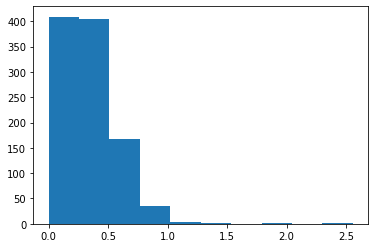

In [335]:
plt.hist(data["distancia"]);

In [336]:
data_validar

,0,Comunas,Estado,Fecha calificación,Fecha presentación,Inversión (MMU$),Latitud punto representativo,Longitud punto representativo,Provincias,Región,Sector productivo,Tipo,Tipología,Titular,WEB,id,diferencia,año,geometry
0,https://seia.sea.gob.cl/expediente/expediente....,Romeral,Desistido,2022-08-24,2022-09-16,2.3500,-35.066846,-71.203770,Curicó-Talca-Cauquenes-Linares,Séptima,Agropecuario,DIA,l3,AGRICOLA SOLER CORTINA S.A,Ver,2156642337,-23,2022,POINT (-71.20377 -35.06685)
1,https://seia.sea.gob.cl/expediente/expediente....,Nogales,No Admitido a Tramitación,2022-09-02,2022-09-02,8.5000,-32.741443,-71.203133,Petorca-San Felipe-Los Andes-Quillota-Valparaí...,Quinta,Inmobiliarios,EIA,g1,roberto gumecindo revuelta bravo,Ver,2156570397,0,2022,POINT (-71.20313 -32.74144)
2,https://seia.sea.gob.cl/expediente/expediente....,San José de Maipo,No Admitido a Tramitación,2022-09-01,2022-09-01,0.0300,-33.591710,-70.478889,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,Minería,DIA,i5,Sociedad Catalán Herrera Hermanos y Compañía L...,Ver,2156817670,0,2022,POINT (-70.47889 -33.59171)
3,https://seia.sea.gob.cl/expediente/expediente....,Angol,No Admitido a Tramitación,2022-08-31,2022-08-31,2.0000,-37.873534,-72.582201,Malleco-Cautín,Novena,Minería,DIA,i5,agricola y forestal maxcon s.a,Ver,2156816662,0,2022,POINT (-72.58220 -37.87353)
4,https://seia.sea.gob.cl/expediente/expediente....,San Fernando-Placilla,No Admitido a Tramitación,2022-08-26,2022-08-26,0.3000,-34.592368,-71.042649,Cardenal Caro-Cachapoal-Colchagua,Sexta,Minería,DIA,i5,Sociedad Inversiones y Aridos San Vicente SpA,Ver,2156794752,0,2022,POINT (-71.04265 -34.59237)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,https://seia.sea.gob.cl/expediente/expediente....,Vitacura,Desistido,2018-09-07,2018-09-05,250.0000,-33.000000,-70.000000,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,Inmobiliarios,DIA,h1,Inmobiliaria L&L Ltda.,Ver,2141328191,2,2018,POINT (-70.00000 -33.00000)
1019,https://seia.sea.gob.cl/expediente/expediente....,Til-Til,Desistido,2018-09-13,2018-08-24,30.0000,-32.000000,-70.000000,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,Energía,DIA,c,Til Til Energía Spa,Ver,2141265441,20,2018,POINT (-70.00000 -32.00000)
1020,https://seia.sea.gob.cl/expediente/expediente....,Ovalle,Desistido,2018-08-20,2018-08-16,5.8305,-30.000000,-71.000000,Elquí-Limarí-Choapa,Cuarta,Inmobiliarios,DIA,g1,Jorge Andrés Heen Monreal,Ver,2141222233,4,2018,POINT (-71.00000 -30.00000)
1021,https://seia.sea.gob.cl/expediente/expediente....,Quilicura,Desistido,2018-08-03,2018-08-01,2.3000,-33.000000,-70.000000,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,Otros,DIA,ñ3,Juan Ignacio Kogan Rozenbaum,Ver,2140924186,2,2018,POINT (-70.00000 -33.00000)


### 7.7.2 Concateno la distancia con la data

In [337]:
data_validar=pd.merge(data_validar,data,left_on="id",right_on="id_project")

In [338]:
data_validar

,0,Comunas,Estado,Fecha calificación,Fecha presentación,Inversión (MMU$),Latitud punto representativo,Longitud punto representativo,Provincias,Región,...,Titular,WEB,id,diferencia,año,geometry,distancia,area,tipo parque,id_project
0,https://seia.sea.gob.cl/expediente/expediente....,Romeral,Desistido,2022-08-24,2022-09-16,2.3500,-35.066846,-71.203770,Curicó-Talca-Cauquenes-Linares,Séptima,...,AGRICOLA SOLER CORTINA S.A,Ver,2156642337,-23,2022,POINT (-71.20377 -35.06685),0.376033,62646695.4519,Parque,2156642337
1,https://seia.sea.gob.cl/expediente/expediente....,Nogales,No Admitido a Tramitación,2022-09-02,2022-09-02,8.5000,-32.741443,-71.203133,Petorca-San Felipe-Los Andes-Quillota-Valparaí...,Quinta,...,roberto gumecindo revuelta bravo,Ver,2156570397,0,2022,POINT (-71.20313 -32.74144),0.201818,108503722.546,Parque,2156570397
2,https://seia.sea.gob.cl/expediente/expediente....,San José de Maipo,No Admitido a Tramitación,2022-09-01,2022-09-01,0.0300,-33.591710,-70.478889,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,...,Sociedad Catalán Herrera Hermanos y Compañía L...,Ver,2156817670,0,2022,POINT (-70.47889 -33.59171),0.097275,189426249.821,Reserva,2156817670
3,https://seia.sea.gob.cl/expediente/expediente....,Angol,No Admitido a Tramitación,2022-08-31,2022-08-31,2.0000,-37.873534,-72.582201,Malleco-Cautín,Novena,...,agricola y forestal maxcon s.a,Ver,2156816662,0,2022,POINT (-72.58220 -37.87353),0.361681,104794969.817,Parque,2156816662
4,https://seia.sea.gob.cl/expediente/expediente....,San Fernando-Placilla,No Admitido a Tramitación,2022-08-26,2022-08-26,0.3000,-34.592368,-71.042649,Cardenal Caro-Cachapoal-Colchagua,Sexta,...,Sociedad Inversiones y Aridos San Vicente SpA,Ver,2156794752,0,2022,POINT (-71.04265 -34.59237),0.352298,48930714.4862,Parque,2156794752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,https://seia.sea.gob.cl/expediente/expediente....,Vitacura,Desistido,2018-09-07,2018-09-05,250.0000,-33.000000,-70.000000,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,...,Inmobiliaria L&L Ltda.,Ver,2141328191,2,2018,POINT (-70.00000 -33.00000),0.268636,74399265.3136,Reserva,2141328191
1019,https://seia.sea.gob.cl/expediente/expediente....,Til-Til,Desistido,2018-09-13,2018-08-24,30.0000,-32.000000,-70.000000,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,...,Til Til Energía Spa,Ver,2141265441,20,2018,POINT (-70.00000 -32.00000),0.955536,74399265.3136,Reserva,2141265441
1020,https://seia.sea.gob.cl/expediente/expediente....,Ovalle,Desistido,2018-08-20,2018-08-16,5.8305,-30.000000,-71.000000,Elquí-Limarí-Choapa,Cuarta,...,Jorge Andrés Heen Monreal,Ver,2141222233,4,2018,POINT (-71.00000 -30.00000),0.38959,1741899.11102,Monumento,2141222233
1021,https://seia.sea.gob.cl/expediente/expediente....,Quilicura,Desistido,2018-08-03,2018-08-01,2.3000,-33.000000,-70.000000,Chacabuco-Santiago-Talagante-Melipilla-Maipo-C...,RM,...,Juan Ignacio Kogan Rozenbaum,Ver,2140924186,2,2018,POINT (-70.00000 -33.00000),0.268636,74399265.3136,Reserva,2140924186


### 7.7.3 Visualizo donde estan los nuevos proyectos

In [339]:
# Create a map
m_2 = folium.Map(location=[-32.892685,-71.452305], tiles='openstreetmap', zoom_start=9)

# Add points to the map
for i in range(len(data_validar)):
    Marker([data_validar['Latitud punto representativo'].iloc[i], data_validar['Longitud punto representativo'].iloc[i]]).add_to(m_2)

# Display the map
m_2.save("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/filename7.html")
m_2

### 7.7.4 Agrego las zonas a cada región

In [340]:
data_validar=data_validar[['Inversión (MMU$)','Tipo','diferencia', 'año','distancia', 'area',
       'tipo parque',"Región","Estado"]]
data_validar["Zona"]=""
data_validar.loc[data_validar["Región"]=="Primera","Zona"]="Zona Norte"
data_validar.loc[data_validar["Región"]=="Segunda","Zona"]="Zona Norte"
data_validar.loc[data_validar["Región"]=="Tercera","Zona"]="Zona Norte"
data_validar.loc[data_validar["Región"]=="Cuarta","Zona"]="Zona Norte"
data_validar.loc[data_validar["Región"]=="Decimoquinta","Zona"]="Zona Norte"

data_validar.loc[data_validar["Región"]=="Quinta","Zona"]="Zona centro"
data_validar.loc[data_validar["Región"]=="RM","Zona"]="Zona centro"
data_validar.loc[data_validar["Región"]=="Sexta","Zona"]="Zona centro"
data_validar.loc[data_validar["Región"]=="Séptima","Zona"]="Zona centro"

data_validar.loc[data_validar["Región"]=="Octava","Zona"]="Zona sur"
data_validar.loc[data_validar["Región"]=="Novena","Zona"]="Zona sur"
data_validar.loc[data_validar["Región"]=="Décima","Zona"]="Zona sur"
data_validar.loc[data_validar["Región"]=="Undécima","Zona"]="Zona sur"
data_validar.loc[data_validar["Región"]=="Duodécima","Zona"]="Zona sur"
data_validar.loc[data_validar["Región"]=="Decimocuarta","Zona"]="Zona sur"
data_validar.loc[data_validar["Región"]=="Décimosexta","Zona"]="Zona sur"

data_validar.loc[data_validar["Región"]=="Interregional","Zona"]="interregional"


C:\Users\crist\AppData\Local\Temp\ipykernel_18248\161453079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_validar["Zona"]=""


In [341]:
data_validar

,Inversión (MMU$),Tipo,diferencia,año,distancia,area,tipo parque,Región,Estado,Zona
0,2.3500,DIA,-23,2022,0.376033,62646695.4519,Parque,Séptima,Desistido,Zona centro
1,8.5000,EIA,0,2022,0.201818,108503722.546,Parque,Quinta,No Admitido a Tramitación,Zona centro
2,0.0300,DIA,0,2022,0.097275,189426249.821,Reserva,RM,No Admitido a Tramitación,Zona centro
3,2.0000,DIA,0,2022,0.361681,104794969.817,Parque,Novena,No Admitido a Tramitación,Zona sur
4,0.3000,DIA,0,2022,0.352298,48930714.4862,Parque,Sexta,No Admitido a Tramitación,Zona centro
...,...,...,...,...,...,...,...,...,...,...
1018,250.0000,DIA,2,2018,0.268636,74399265.3136,Reserva,RM,Desistido,Zona centro
1019,30.0000,DIA,20,2018,0.955536,74399265.3136,Reserva,RM,Desistido,Zona centro
1020,5.8305,DIA,4,2018,0.38959,1741899.11102,Monumento,Cuarta,Desistido,Zona Norte
1021,2.3000,DIA,2,2018,0.268636,74399265.3136,Reserva,RM,Desistido,Zona centro


In [342]:
data_validar["Estado"].value_counts()

Desistido                    355
Aprobado                     339
No Admitido a Tramitación    228
No calificado                 77
Rechazado                     24
Name: Estado, dtype: int64

### 7.7.5 creo el nuevo estado 

In [343]:
data_validar["Estado_nuevo"]="Desaprobado"
data_validar.loc[data_validar["Estado"]=="Aprobado","Estado_nuevo"]="Aprobado"
data_validar.head(5)

C:\Users\crist\AppData\Local\Temp\ipykernel_18248\2791405927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_validar["Estado_nuevo"]="Desaprobado"


,Inversión (MMU$),Tipo,diferencia,año,distancia,area,tipo parque,Región,Estado,Zona,Estado_nuevo
0,2.35,DIA,-23,2022,0.376033,62646695.4519,Parque,Séptima,Desistido,Zona centro,Desaprobado
1,8.50,EIA,0,2022,0.201818,108503722.546,Parque,Quinta,No Admitido a Tramitación,Zona centro,Desaprobado
2,0.03,DIA,0,2022,0.097275,189426249.821,Reserva,RM,No Admitido a Tramitación,Zona centro,Desaprobado
3,2.00,DIA,0,2022,0.361681,104794969.817,Parque,Novena,No Admitido a Tramitación,Zona sur,Desaprobado
4,0.30,DIA,0,2022,0.352298,48930714.4862,Parque,Sexta,No Admitido a Tramitación,Zona centro,Desaprobado


### 7.7.7 Codificacacion, labelencoder y OneHotEncoder

In [344]:
data_validar.loc[data_validar["Tipo"]=="DIA","Tipo"]=0
data_validar.loc[data_validar["Tipo"]=="EIA","Tipo"]=1

In [345]:
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
data_validar['Zona'] = labelencoder.fit_transform(data_validar['Zona'])
data_validar

C:\Users\crist\AppData\Local\Temp\ipykernel_18248\3297260427.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_validar['Zona'] = labelencoder.fit_transform(data_validar['Zona'])


,Inversión (MMU$),Tipo,diferencia,año,distancia,area,tipo parque,Región,Estado,Zona,Estado_nuevo
0,2.3500,0,-23,2022,0.376033,62646695.4519,Parque,Séptima,Desistido,1,Desaprobado
1,8.5000,1,0,2022,0.201818,108503722.546,Parque,Quinta,No Admitido a Tramitación,1,Desaprobado
2,0.0300,0,0,2022,0.097275,189426249.821,Reserva,RM,No Admitido a Tramitación,1,Desaprobado
3,2.0000,0,0,2022,0.361681,104794969.817,Parque,Novena,No Admitido a Tramitación,2,Desaprobado
4,0.3000,0,0,2022,0.352298,48930714.4862,Parque,Sexta,No Admitido a Tramitación,1,Desaprobado
...,...,...,...,...,...,...,...,...,...,...,...
1018,250.0000,0,2,2018,0.268636,74399265.3136,Reserva,RM,Desistido,1,Desaprobado
1019,30.0000,0,20,2018,0.955536,74399265.3136,Reserva,RM,Desistido,1,Desaprobado
1020,5.8305,0,4,2018,0.38959,1741899.11102,Monumento,Cuarta,Desistido,0,Desaprobado
1021,2.3000,0,2,2018,0.268636,74399265.3136,Reserva,RM,Desistido,1,Desaprobado


In [346]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data_validar[['tipo parque']]).toarray())
data_validar = data_validar.join(enc_df)
data_validar=data_validar.rename(columns={1:"Monumento",2:"Reserva",0:"Parque",3:"Santuario"})
data_validar=data_validar.drop(["tipo parque"], axis=1)
#data_validar
data_validar

,Inversión (MMU$),Tipo,diferencia,año,distancia,area,Región,Estado,Zona,Estado_nuevo,Parque,Monumento,Reserva,Santuario
0,2.3500,0,-23,2022,0.376033,62646695.4519,Séptima,Desistido,1,Desaprobado,0.0,1.0,0.0,0.0
1,8.5000,1,0,2022,0.201818,108503722.546,Quinta,No Admitido a Tramitación,1,Desaprobado,0.0,1.0,0.0,0.0
2,0.0300,0,0,2022,0.097275,189426249.821,RM,No Admitido a Tramitación,1,Desaprobado,0.0,0.0,1.0,0.0
3,2.0000,0,0,2022,0.361681,104794969.817,Novena,No Admitido a Tramitación,2,Desaprobado,0.0,1.0,0.0,0.0
4,0.3000,0,0,2022,0.352298,48930714.4862,Sexta,No Admitido a Tramitación,1,Desaprobado,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,250.0000,0,2,2018,0.268636,74399265.3136,RM,Desistido,1,Desaprobado,0.0,0.0,1.0,0.0
1019,30.0000,0,20,2018,0.955536,74399265.3136,RM,Desistido,1,Desaprobado,0.0,0.0,1.0,0.0
1020,5.8305,0,4,2018,0.38959,1741899.11102,Cuarta,Desistido,0,Desaprobado,1.0,0.0,0.0,0.0
1021,2.3000,0,2,2018,0.268636,74399265.3136,RM,Desistido,1,Desaprobado,0.0,0.0,1.0,0.0


In [354]:
X=data_validar[data_validar.columns.difference(["Región","Estado","Estado_nuevo"])]
y=data_validar["Estado_nuevo"]
X=X[['area','año','diferencia',"distancia",'Inversión (MMU$)','Tipo','Zona','Monumento', 'Parque', 'Reserva', 'Santuario']]
X

,area,año,diferencia,distancia,Inversión (MMU$),Tipo,Zona,Monumento,Parque,Reserva,Santuario
0,62646695.4519,2022,-23,0.376033,2.3500,0,1,1.0,0.0,0.0,0.0
1,108503722.546,2022,0,0.201818,8.5000,1,1,1.0,0.0,0.0,0.0
2,189426249.821,2022,0,0.097275,0.0300,0,1,0.0,0.0,1.0,0.0
3,104794969.817,2022,0,0.361681,2.0000,0,2,1.0,0.0,0.0,0.0
4,48930714.4862,2022,0,0.352298,0.3000,0,1,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1018,74399265.3136,2018,2,0.268636,250.0000,0,1,0.0,0.0,1.0,0.0
1019,74399265.3136,2018,20,0.955536,30.0000,0,1,0.0,0.0,1.0,0.0
1020,1741899.11102,2018,4,0.38959,5.8305,0,0,0.0,1.0,0.0,0.0
1021,74399265.3136,2018,2,0.268636,2.3000,0,1,0.0,0.0,1.0,0.0


## 7.8 Subdivido la data

In [355]:
scaler = StandardScaler()
scaler.fit(X[X.columns.difference(['Tipo', 'Zona', 'Monumento', 'Parque',
       'Reserva', 'Santuario'])])
X1 = scaler.transform(X[X.columns.difference(['Tipo', 'Zona', 'Monumento', 'Parque',
       'Reserva', 'Santuario'])])

In [356]:
X_train=np.array(pd.concat([pd.DataFrame(X1),X[['Tipo', 'Zona', 'Monumento', 'Parque',
       'Reserva', 'Santuario']].reset_index(drop=True)],axis=1))

## 7.9 Cargo los modelos

In [358]:
import joblib
knn=joblib.load("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/modelo_knn.pkl")
bosque=joblib.load("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/modelo_bosque.pkl")
log=joblib.load("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/modelo_reglog.pkl")
Arbol=joblib.load("C:/Users/crist/Python_jupiter/Bootcamp_python/Semana_7/modelo_Arbol.pkl")

## 7.10 Resultados

### 7.10.1 Resultado vecinos cercano

In [359]:
validacion_knn=knn.predict(X_train)
print(classification_report(y, validacion_knn))

              precision    recall  f1-score   support

    Aprobado       0.38      1.00      0.55       339
 Desaprobado       1.00      0.18      0.30       684

    accuracy                           0.45      1023
   macro avg       0.69      0.59      0.43      1023
weighted avg       0.79      0.45      0.39      1023



### 7.10.2 Resultado Bosque aleatorio

In [360]:
validacion_bosque=bosque.predict(X_train)
print(classification_report(y, validacion_bosque))

              precision    recall  f1-score   support

    Aprobado       0.38      1.00      0.55       339
 Desaprobado       1.00      0.18      0.31       684

    accuracy                           0.45      1023
   macro avg       0.69      0.59      0.43      1023
weighted avg       0.79      0.45      0.39      1023



### 7.10.3 Resultado regresion logistica

In [361]:
validacion_log=log.predict(X_train)
print(classification_report(y, validacion_log))

              precision    recall  f1-score   support

    Aprobado       0.38      0.98      0.54       339
 Desaprobado       0.96      0.19      0.32       684

    accuracy                           0.46      1023
   macro avg       0.67      0.59      0.43      1023
weighted avg       0.76      0.46      0.40      1023



### 7.10.4 Resultado Arbol de decisiones

In [362]:
validacion_Arbol=Arbol.predict(X_train)
print(classification_report(y, validacion_Arbol))

              precision    recall  f1-score   support

    Aprobado       0.37      1.00      0.54       339
 Desaprobado       1.00      0.16      0.27       684

    accuracy                           0.44      1023
   macro avg       0.69      0.58      0.41      1023
weighted avg       0.79      0.44      0.36      1023



In [363]:
data_validar["Estado_nuevo"].value_counts()

Desaprobado    684
Aprobado       339
Name: Estado_nuevo, dtype: int64

In [365]:
print(confusion_matrix(y, validacion_Arbol))

[[339   0]
 [577 107]]


In [366]:
y

0       Desaprobado
1       Desaprobado
2       Desaprobado
3       Desaprobado
4       Desaprobado
           ...     
1018    Desaprobado
1019    Desaprobado
1020    Desaprobado
1021    Desaprobado
1022    Desaprobado
Name: Estado_nuevo, Length: 1023, dtype: object

In [370]:
validacion_Arbol

array(['Aprobado', 'Aprobado', 'Aprobado', ..., 'Desaprobado',
       'Desaprobado', 'Desaprobado'], dtype=object)